In [8]:
import pandas as pd
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [78]:
natural = pd.read_csv("https://data.cityofnewyork.us/api/views/uedp-fegm/rows.csv?accessType=DOWNLOAD")

In [79]:
natural.columns

Index([u'Zip Code', u'Building type (service class', u' Consumption (therms) ',
       u' Consumption (GJ) ', u'Utility/Data Source'],
      dtype='object')

In [80]:
zips = natural['Zip Code'].values

In [81]:
zips2 = []
for elem in zips:
    zips2.append(int(elem[:5]))

In [82]:
print(type(zips2[0]))

<type 'int'>


In [83]:
natural['Zip Code'] = zips2

In [84]:
borough = {10026: 'Manhattan', 10027: 'Manhattan', 10030: 'Manhattan', 10037: 'Manhattan', 10039: 'Manhattan', 10001: 'Manhattan', 10011: 'Manhattan', 10018: 'Manhattan', 10019: 'Manhattan', 10020: 'Manhattan', 10036: 'Manhattan', 10029: 'Manhattan', 10035: 'Manhattan', 10010: 'Manhattan', 10016: 'Manhattan', 10017: 'Manhattan', 10022: 'Manhattan', 10012: 'Manhattan', 10013: 'Manhattan', 10014: 'Manhattan', 10004: 'Manhattan', 10005: 'Manhattan', 10006: 'Manhattan', 10007: 'Manhattan', 10038: 'Manhattan', 10280: 'Manhattan', 10002: 'Manhattan', 10003: 'Manhattan', 10009: 'Manhattan', 10021: 'Manhattan', 10028: 'Manhattan', 10044: 'Manhattan', 10065: 'Manhattan', 10075: 'Manhattan', 10128: 'Manhattan', 10023: 'Manhattan', 10024: 'Manhattan', 10025: 'Manhattan', 10031: 'Manhattan', 10032: 'Manhattan', 10033: 'Manhattan', 10034: 'Manhattan', 10040: 'Manhattan'}

In [85]:
print(len(borough))

43


In [86]:
print(type(borough[10025][0]))

<type 'str'>


In [87]:
natural = natural.drop(['Building type (service class', ' Consumption (therms) '], axis=1).dropna()

In [88]:
natural['Borough'] = natural['Zip Code'].map(borough)

In [96]:
print(type(natural))

<class 'pandas.core.frame.DataFrame'>


In [97]:
natural2 = pd.DataFrame(natural[' Consumption (GJ) '].groupby([natural['Zip Code'], natural['Utility/Data Source'], natural['Borough']]).mean())

In [120]:
natural2.reset_index(inplace=True)

In [121]:
#natural2.set_index('Zip Code')

In [122]:
natural2.columns

Index([u'index', u'Zip Code', u'Utility/Data Source', u'Borough',
       u' Consumption (GJ) '],
      dtype='object')

In [123]:
natural2 = natural2.drop(['index'], axis=1)

In [111]:
print(len(natural2))

43


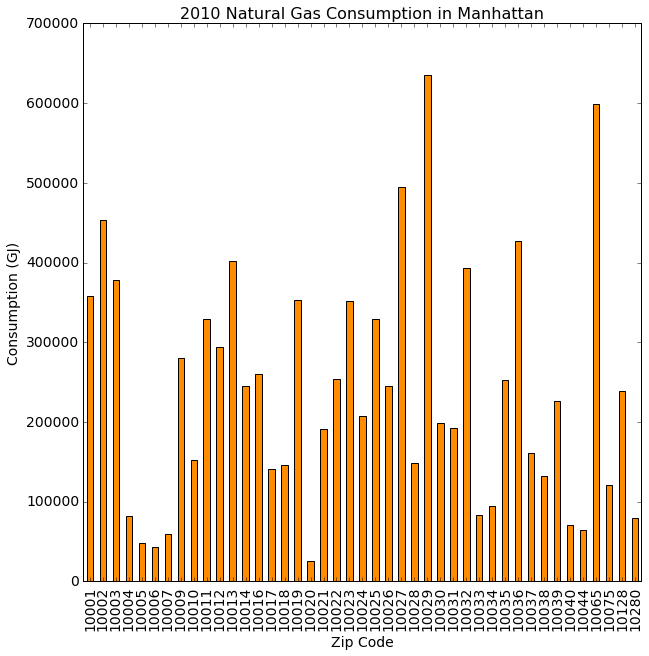

In [126]:
ax = natural2.plot(x='Zip Code', y=' Consumption (GJ) ', kind='bar', figsize=(10,10), legend=False, fontsize=14, color='DarkOrange')
ax.set_title('2010 Natural Gas Consumption in Manhattan', fontsize=16)
ax.set_ylabel('Consumption (GJ)', fontsize=14)
ax.set_xlabel('Zip Code', fontsize=14)

In [70]:
#natural2['Zip Code'].to_numeric()